<a href="https://colab.research.google.com/github/Maryyy-12/EMG-Data-Analysis/blob/main/Another_copy_of_All_10_channels_data(S1_A1_E1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pywavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 54.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import pywt
from scipy.signal import butter, lfilter, freqz, welch, spectrogram
import pandas as pd


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving S1_A1_E1.mat to S1_A1_E1.mat


In [ ]:
# Load the .mat file
import scipy.io

file_name = 'S1_A1_E1.mat'
mat_data = scipy.io.loadmat(file_name)

# Access the EMG data
data = mat_data['emg']  # This assumes 'emg' contains your EMG data

# Check the shape of the data
print(data.shape)


(101014, 10)


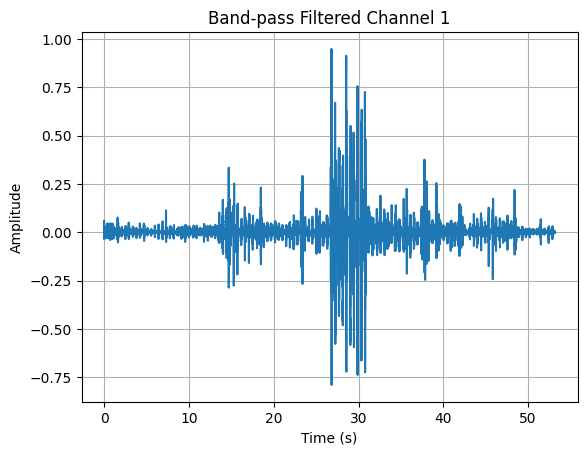

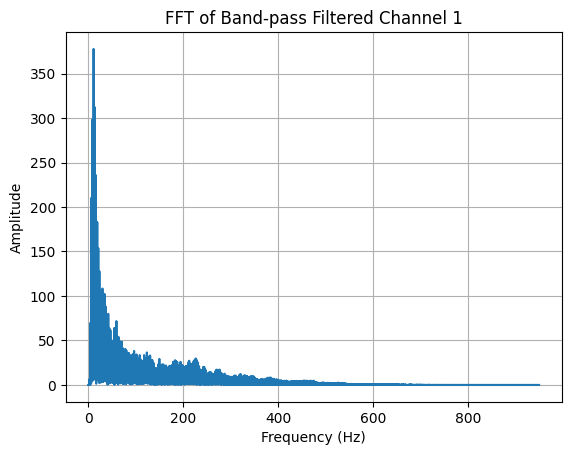

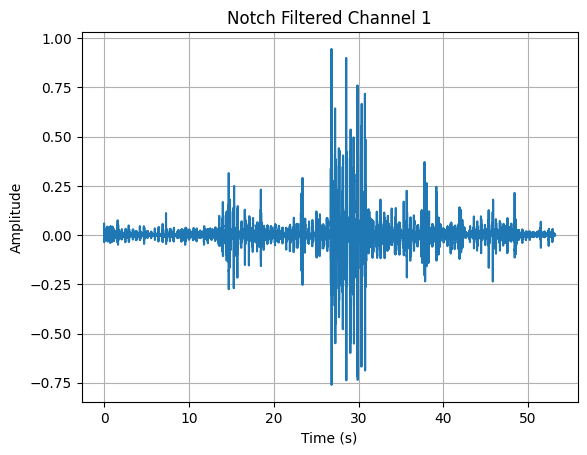

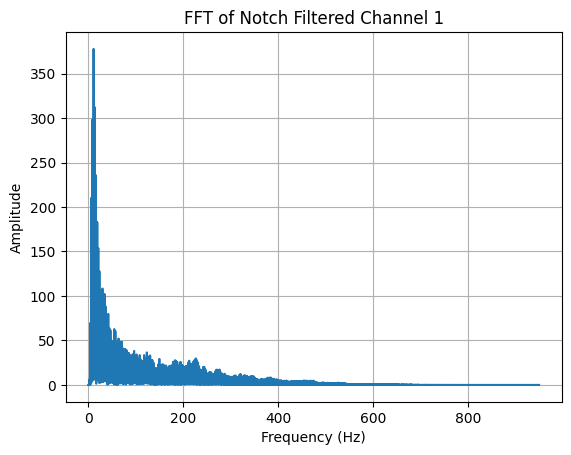

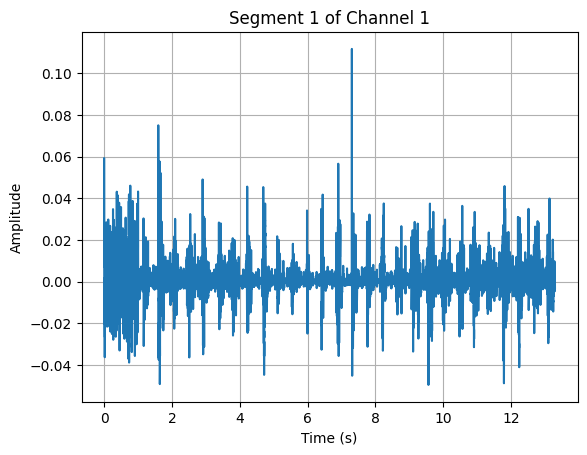

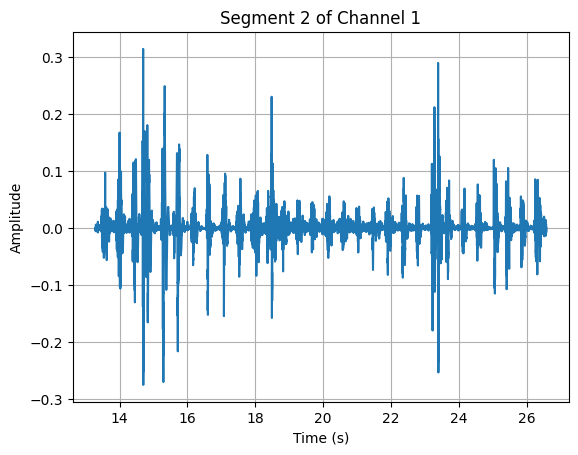

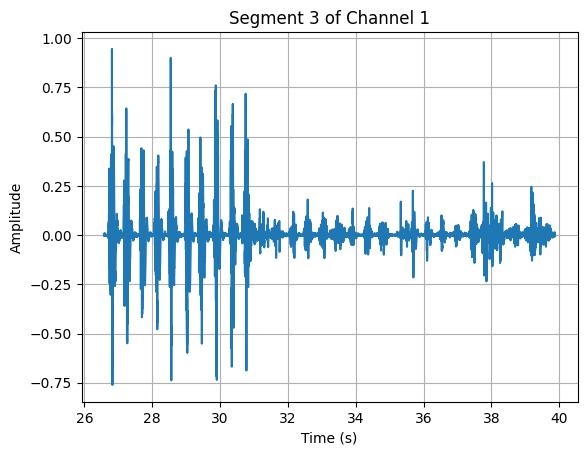

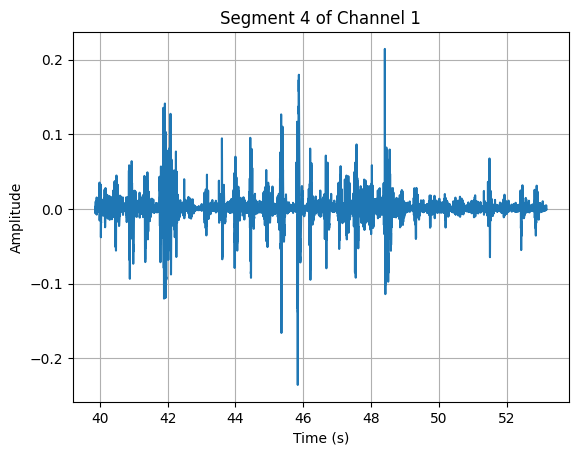

<ipython-input-7-64a10f35a0c7>:45: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(t, f, np.log(Sxx))


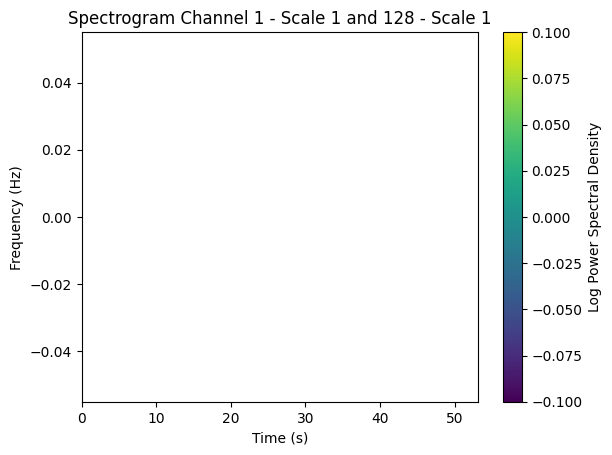

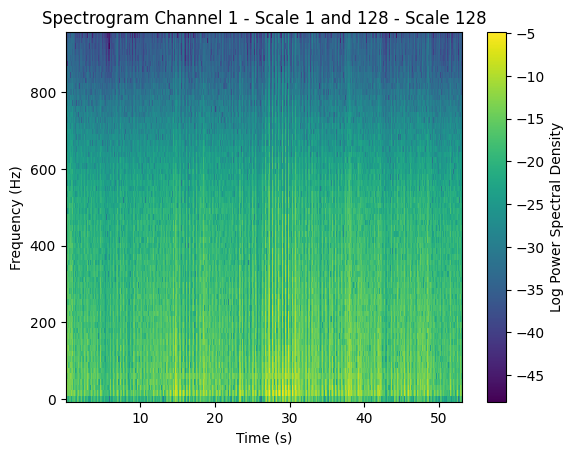

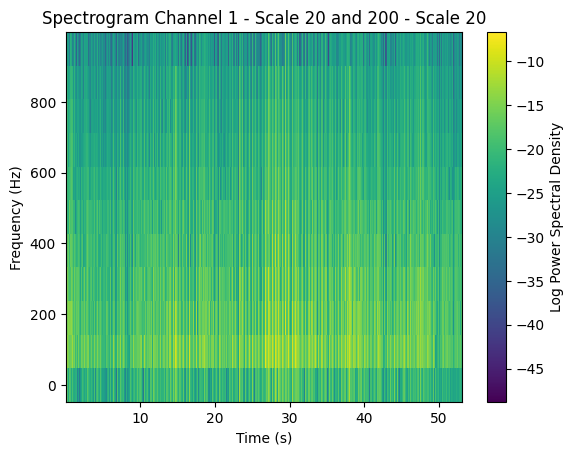

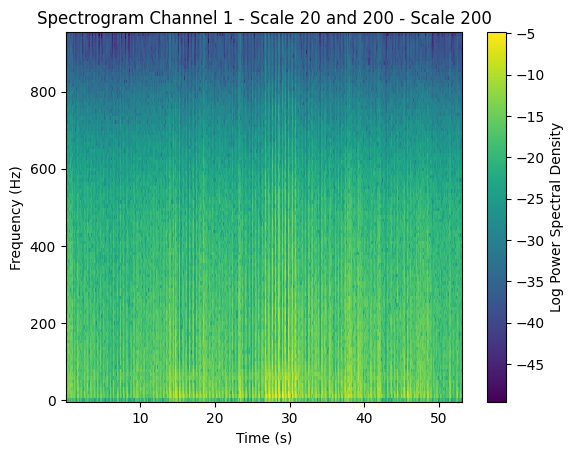

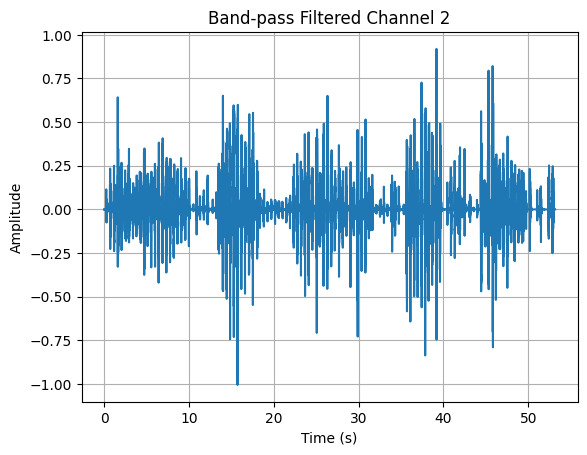

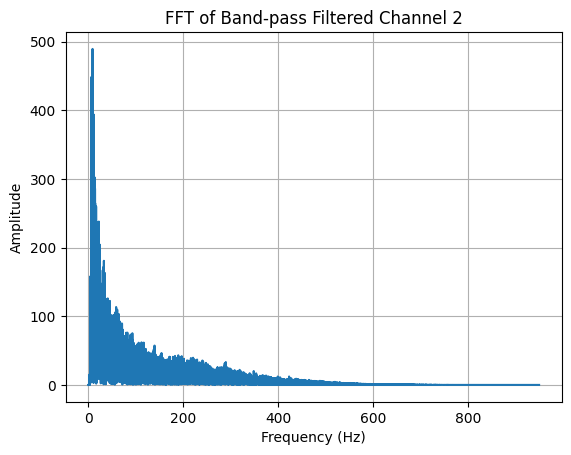

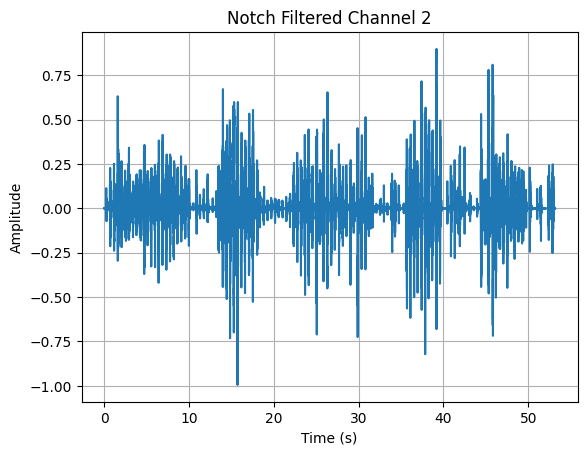

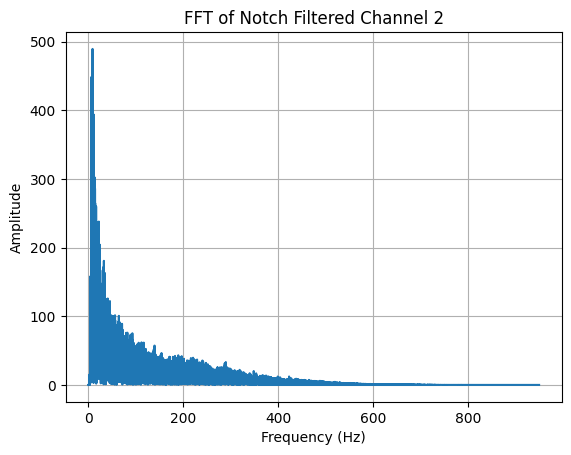

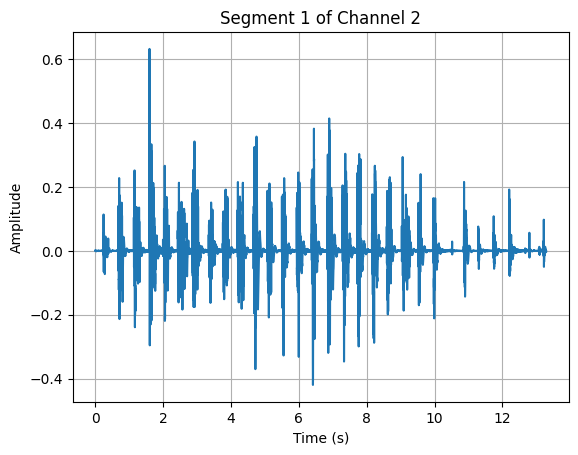

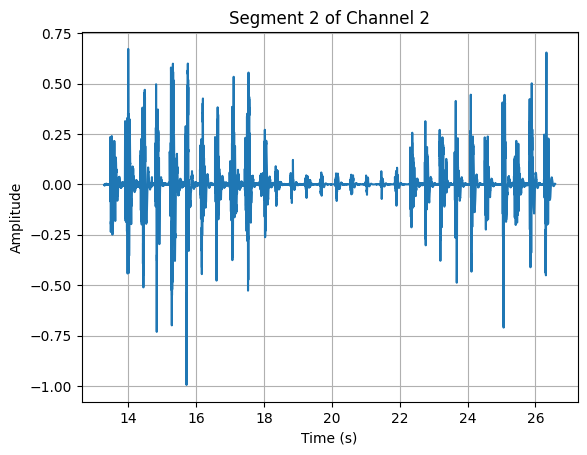

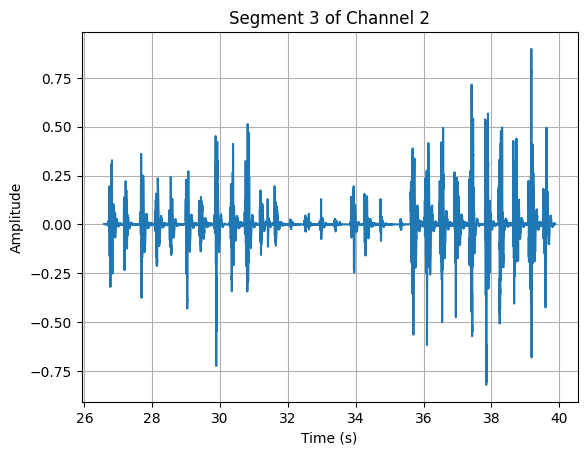

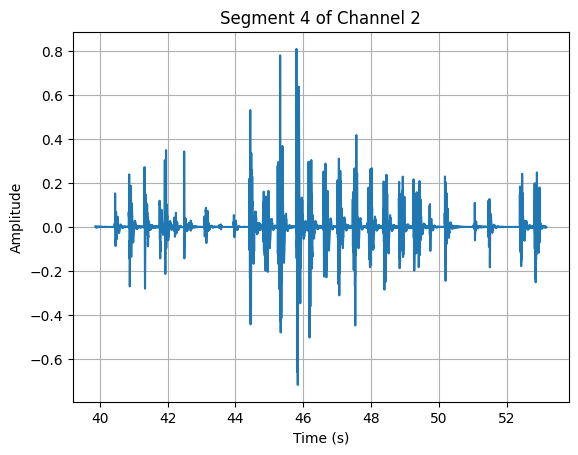

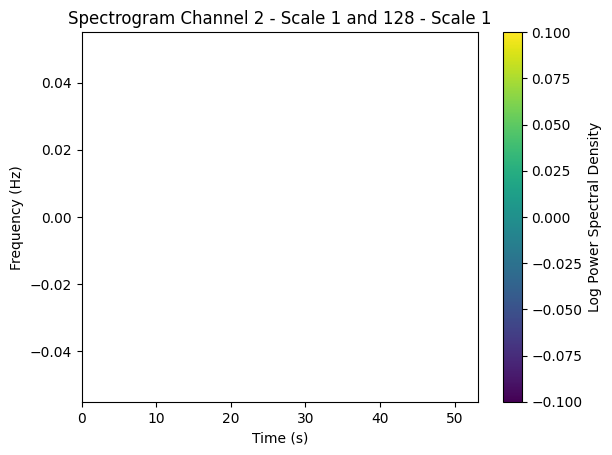

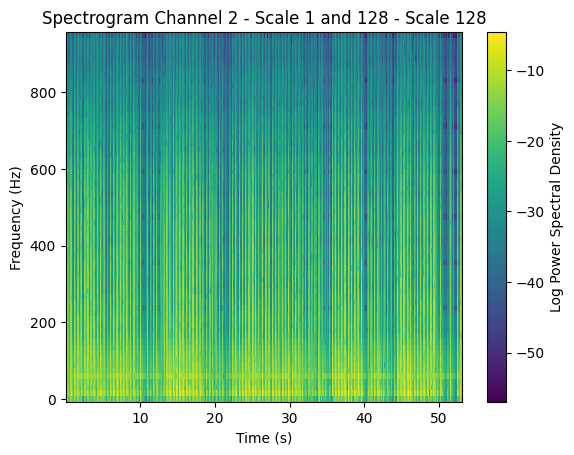

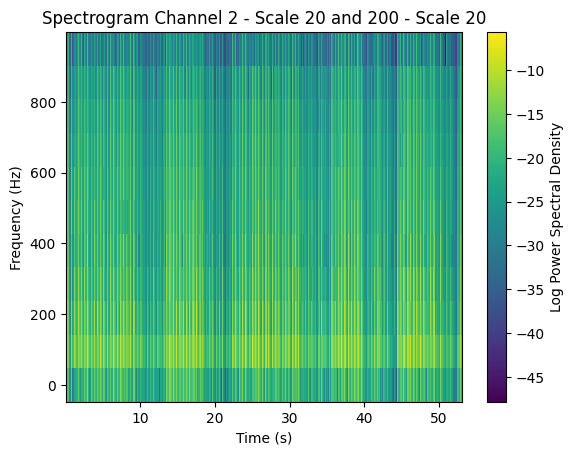

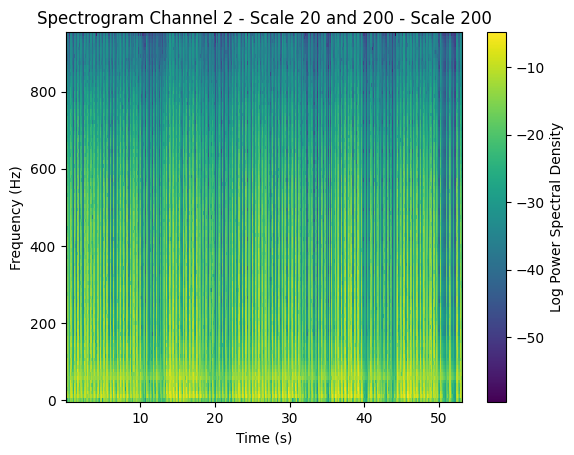

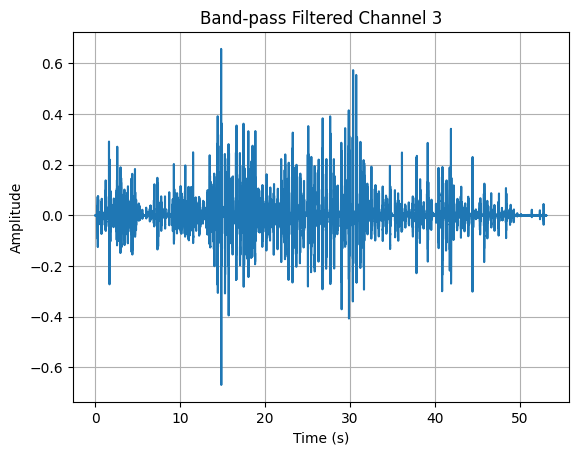

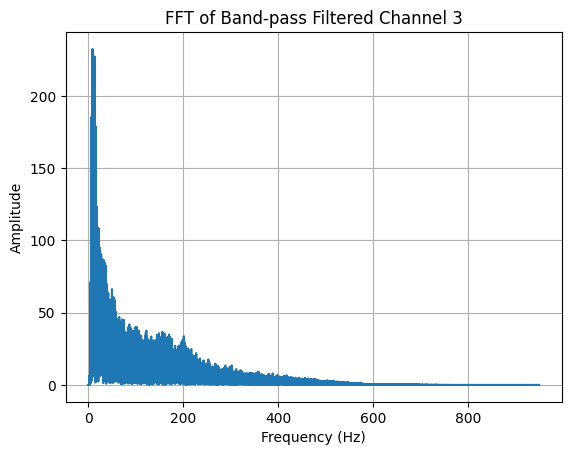

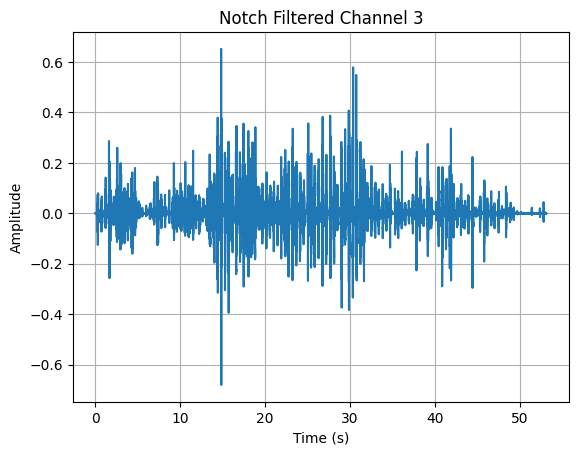

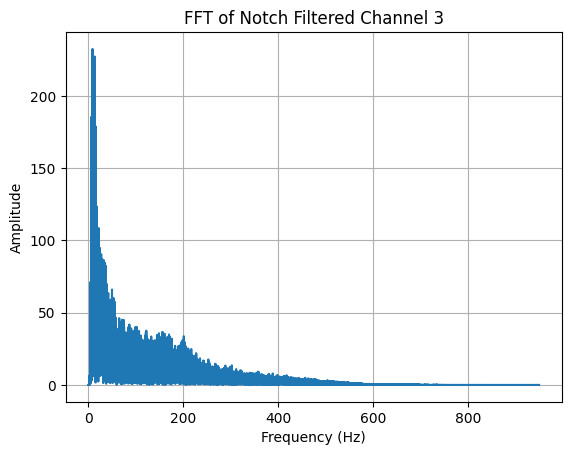

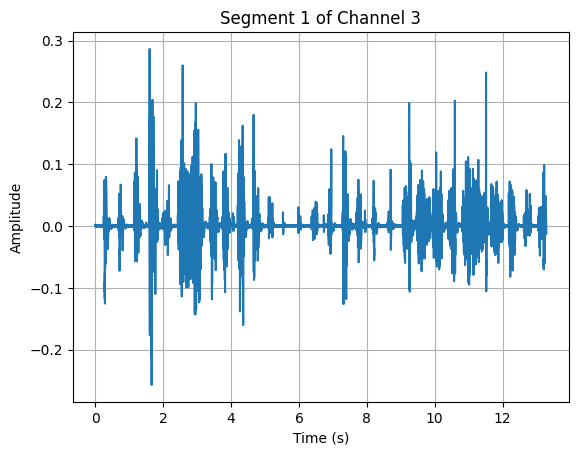

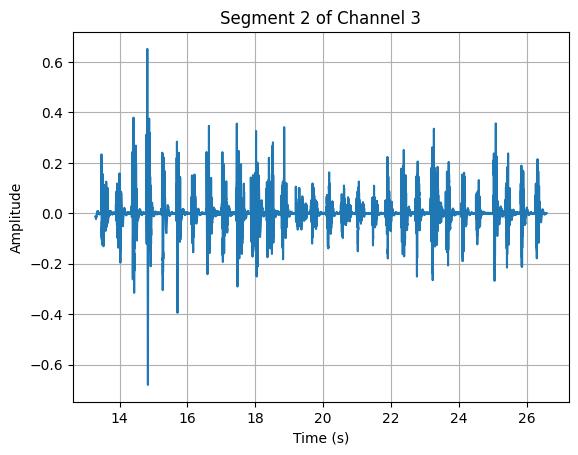

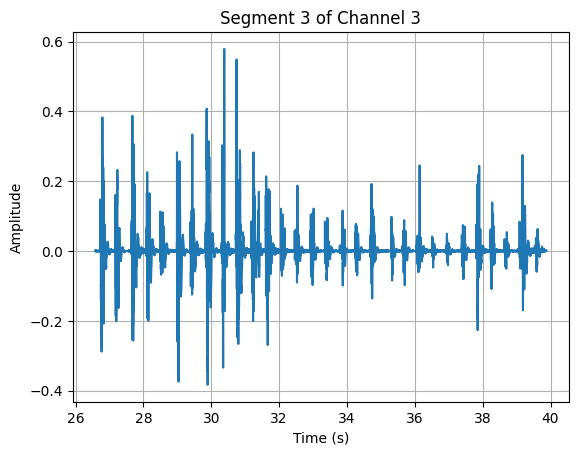

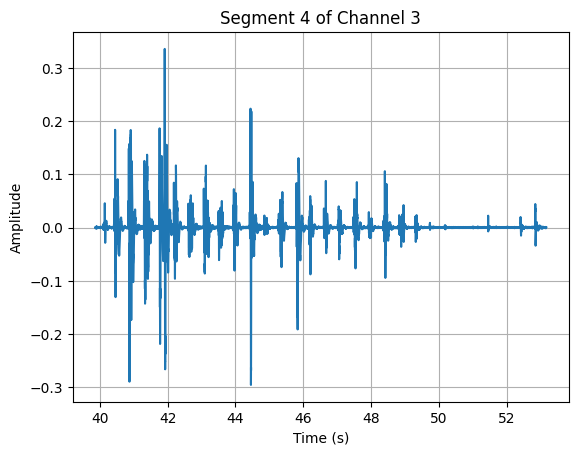

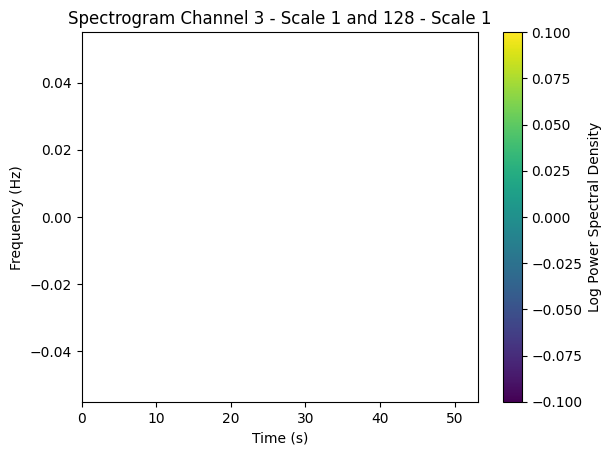

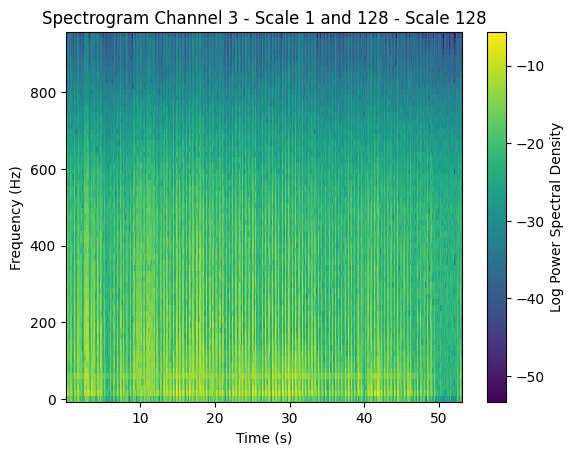

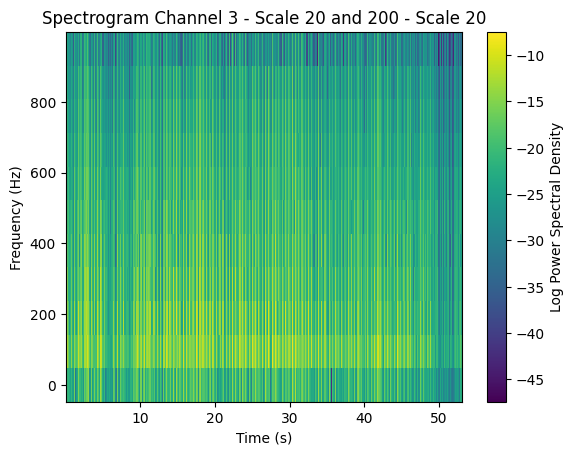

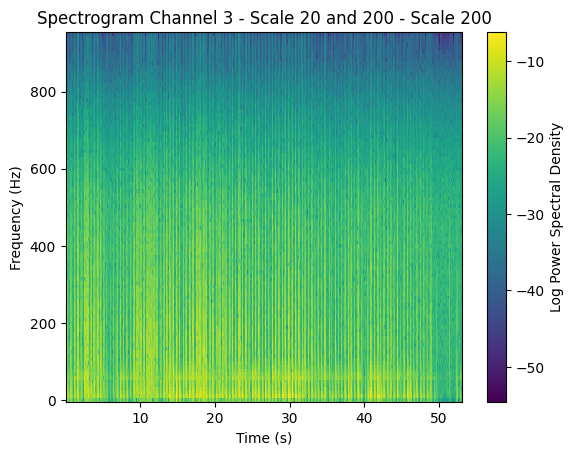

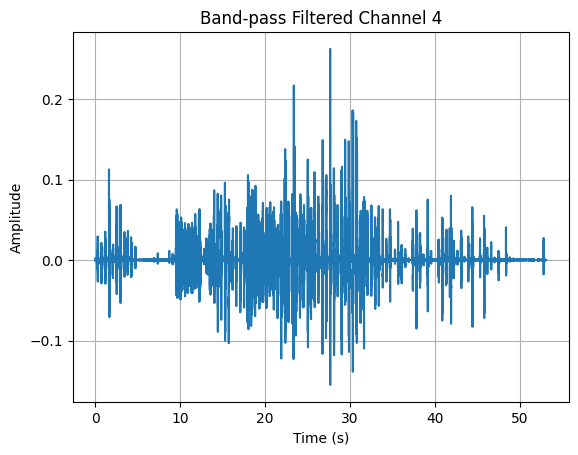

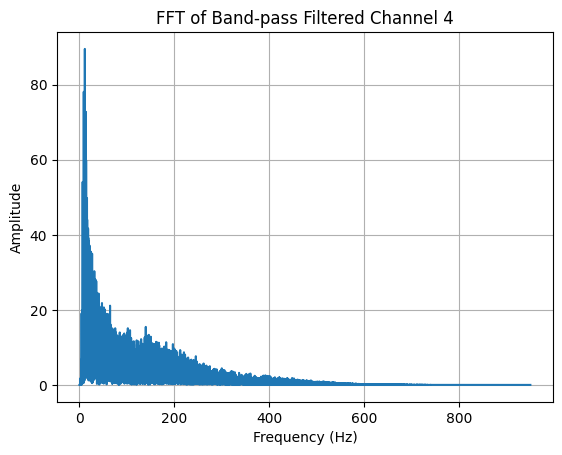

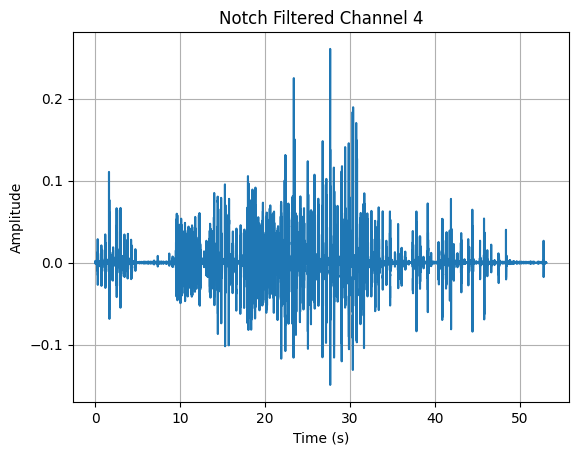

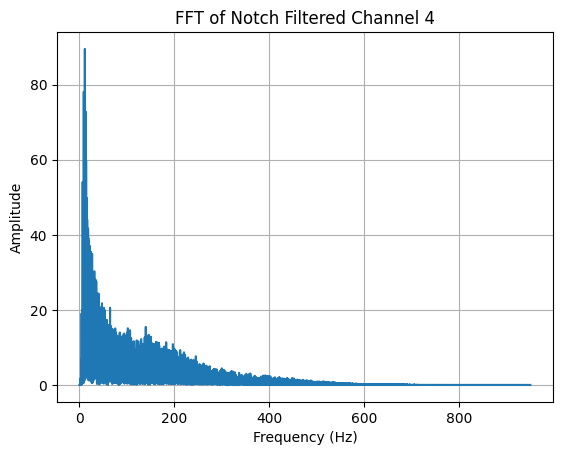

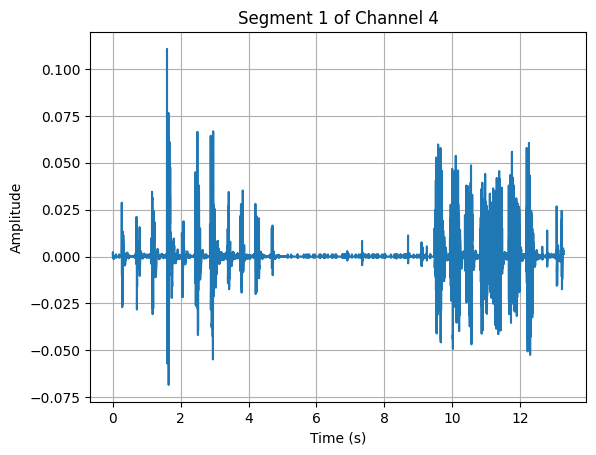

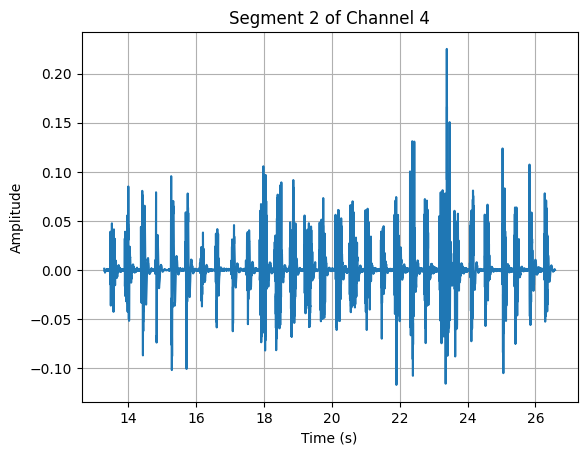

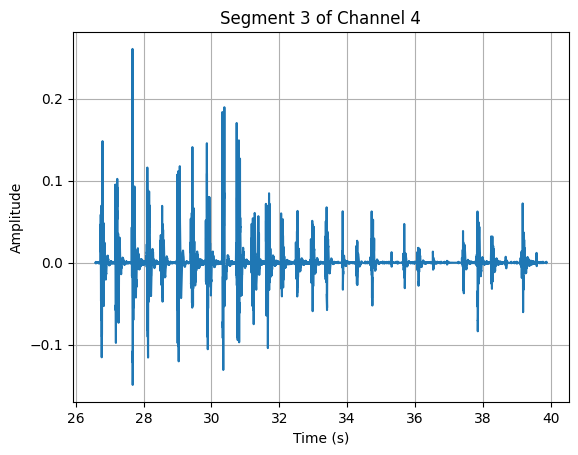

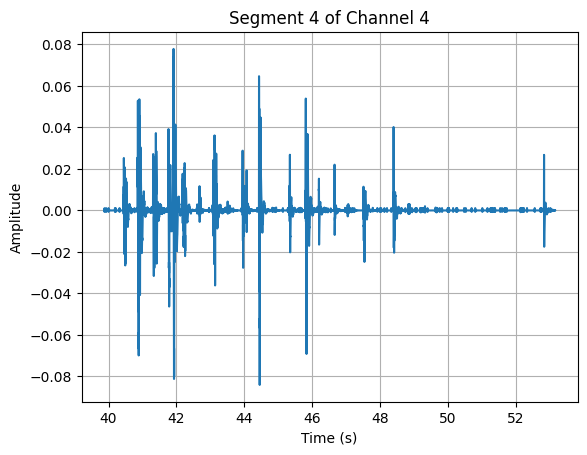

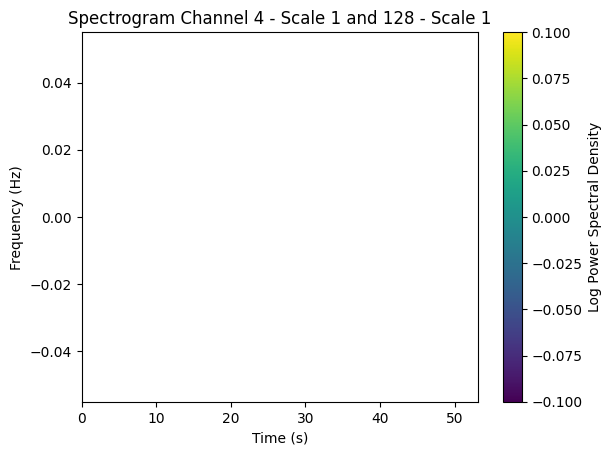

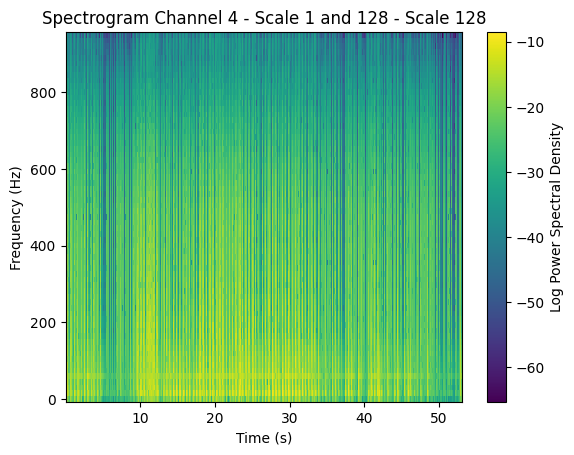

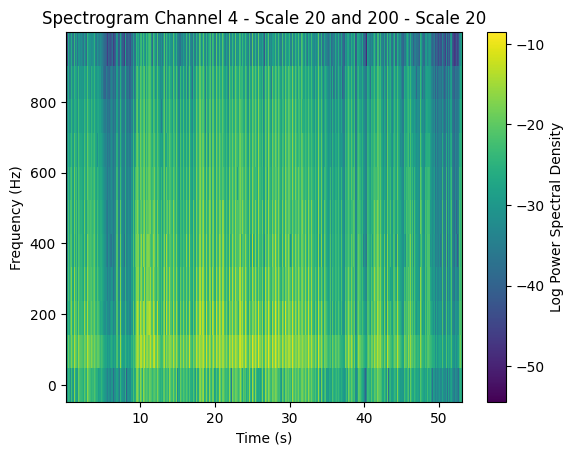

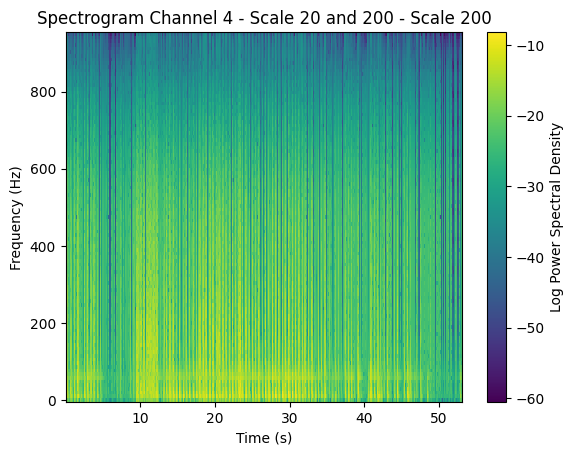

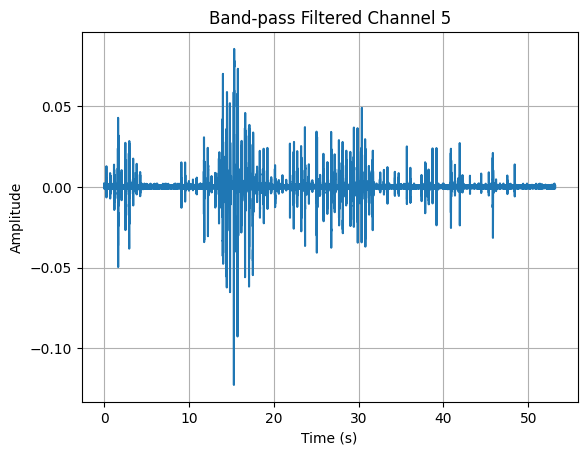

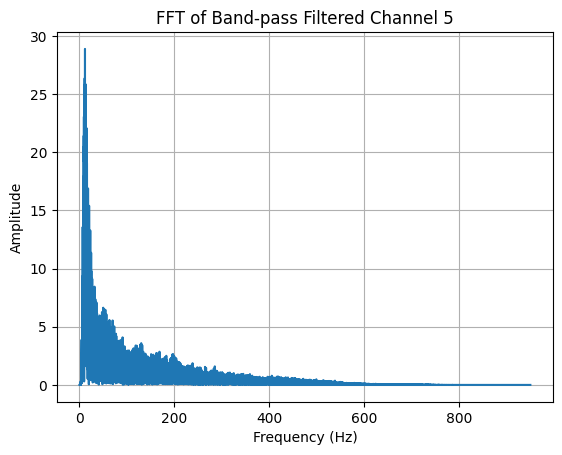

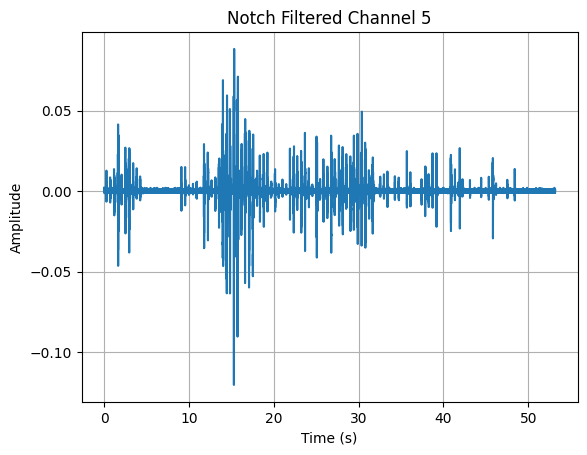

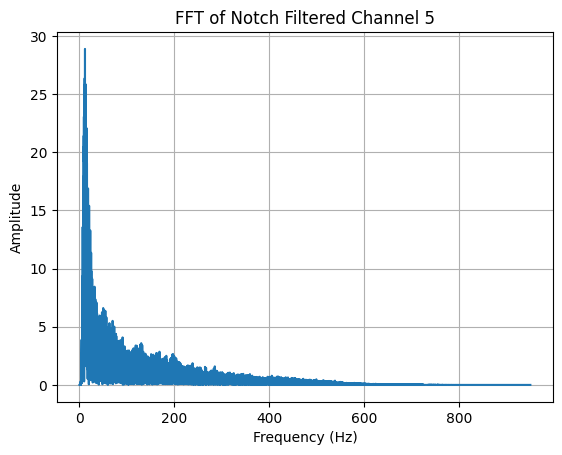

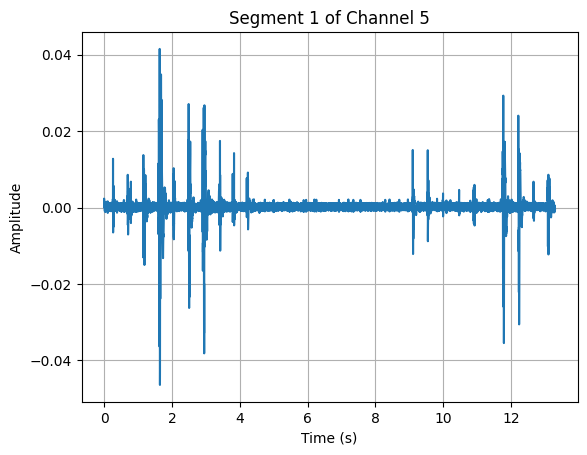

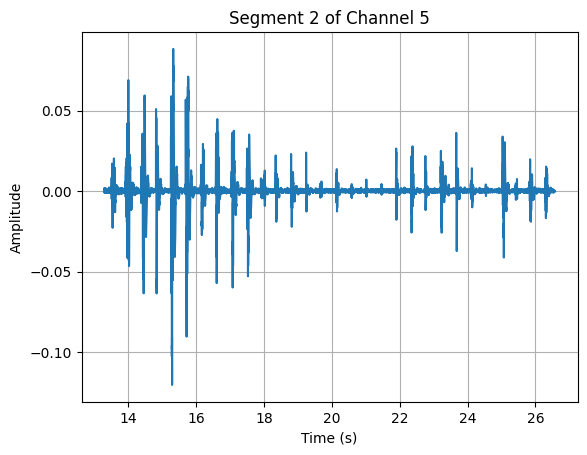

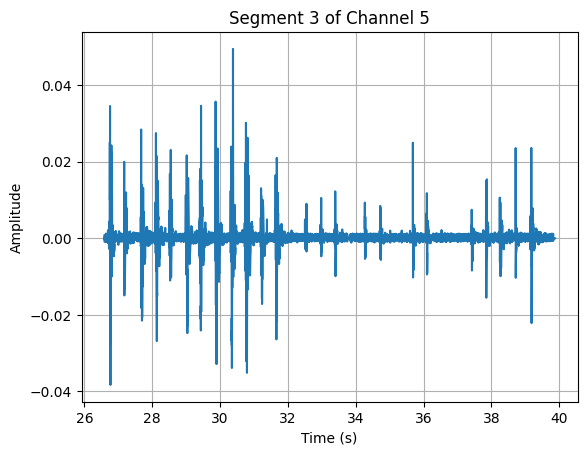

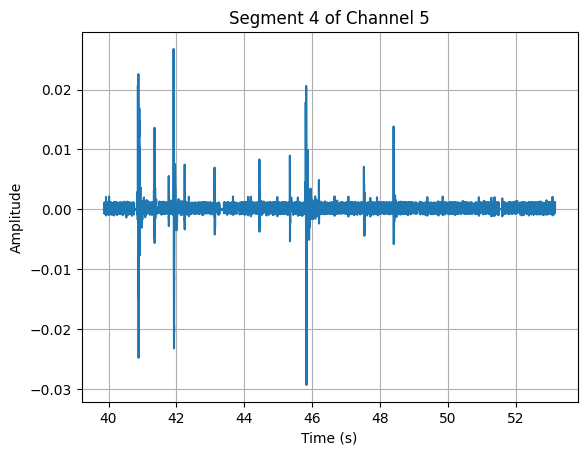

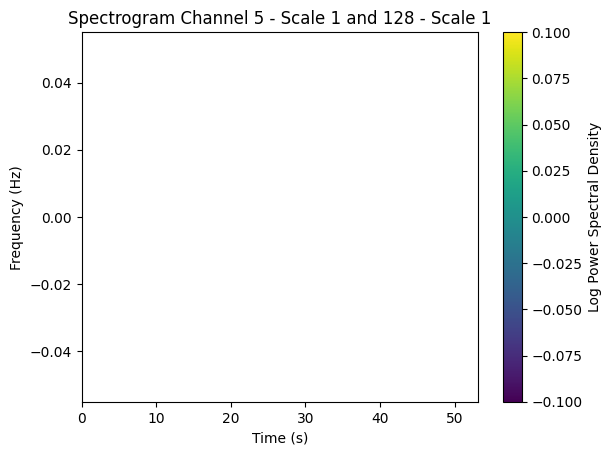

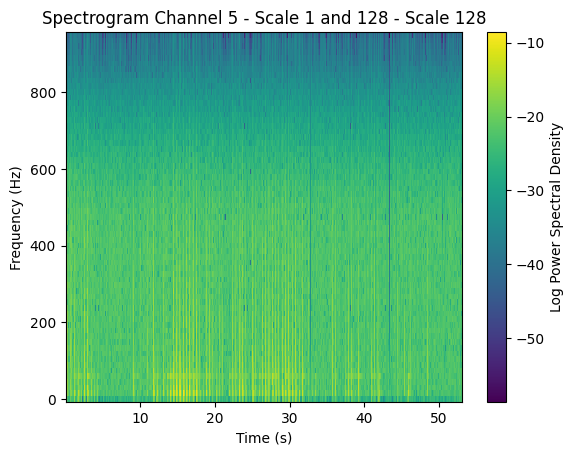

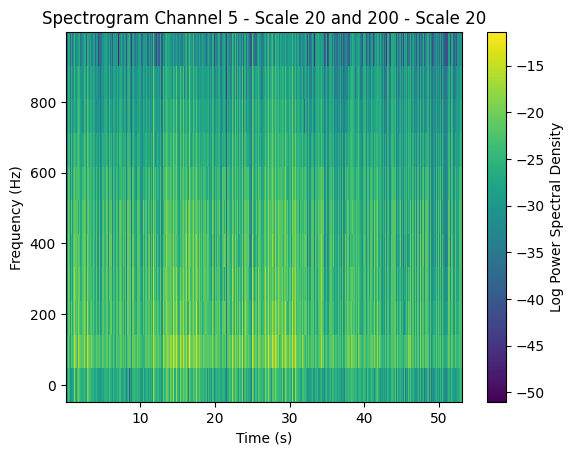

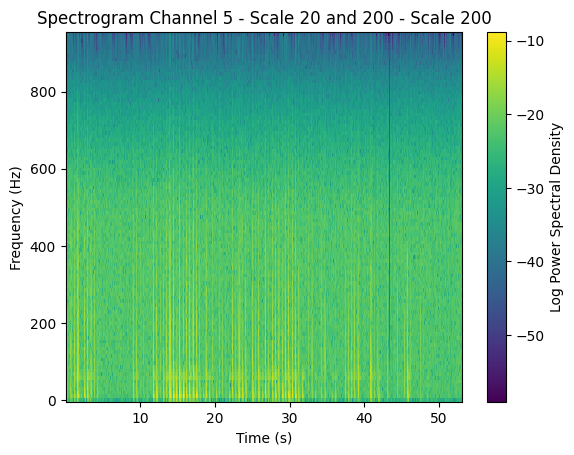

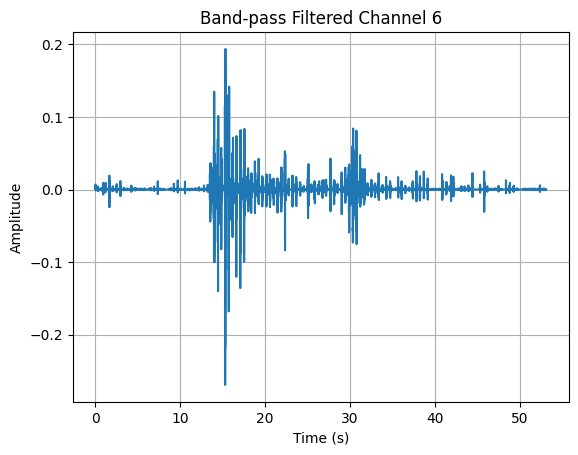

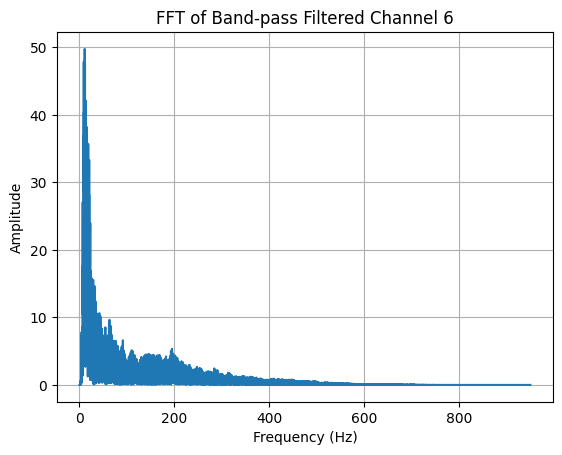

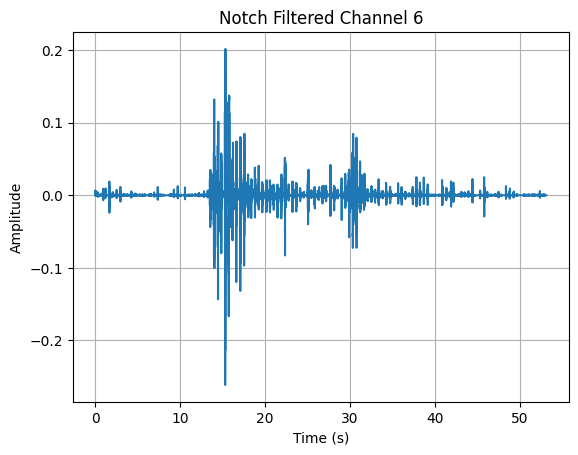

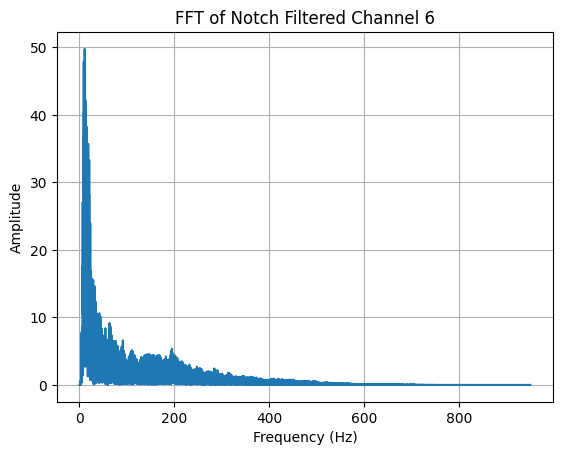

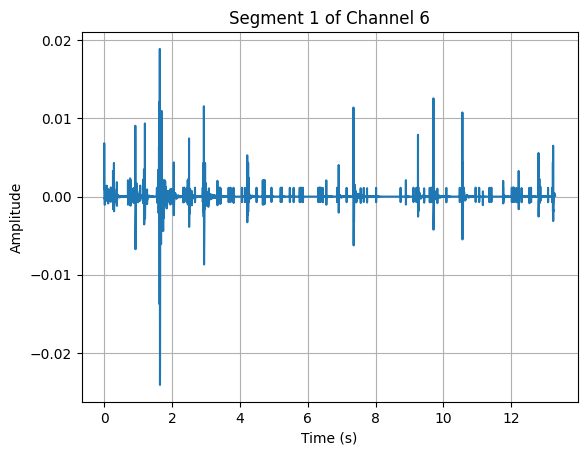

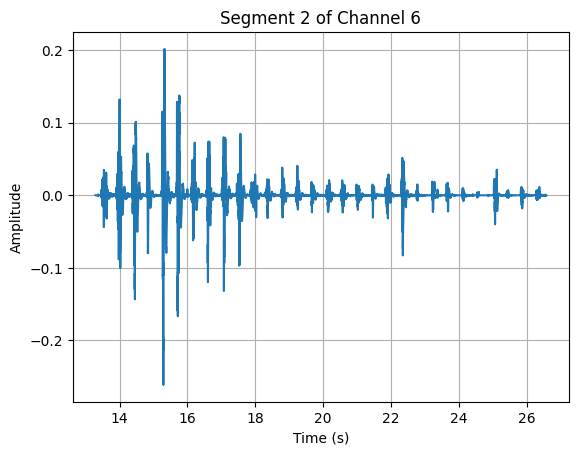

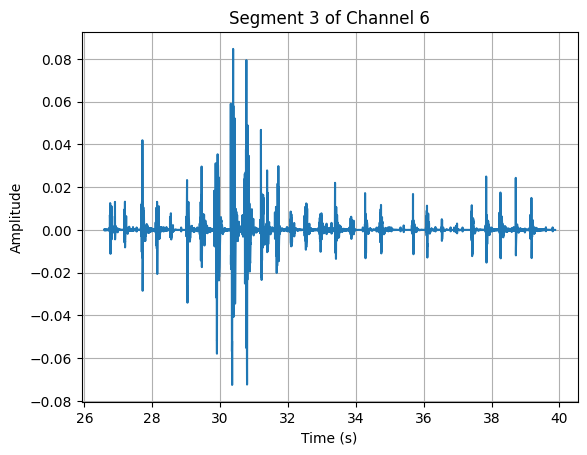

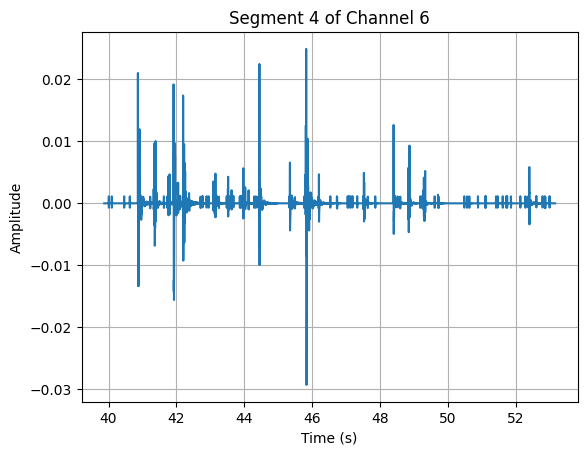

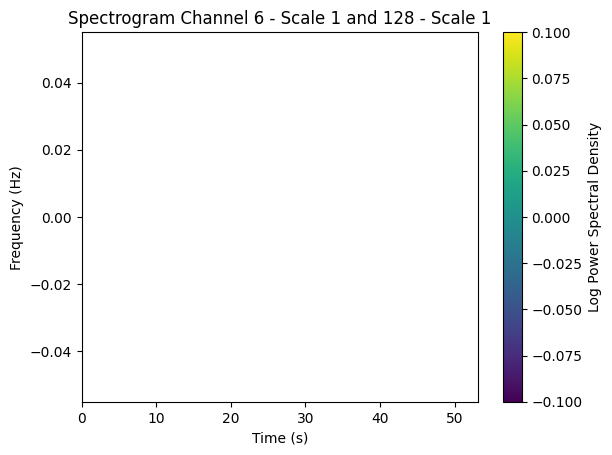

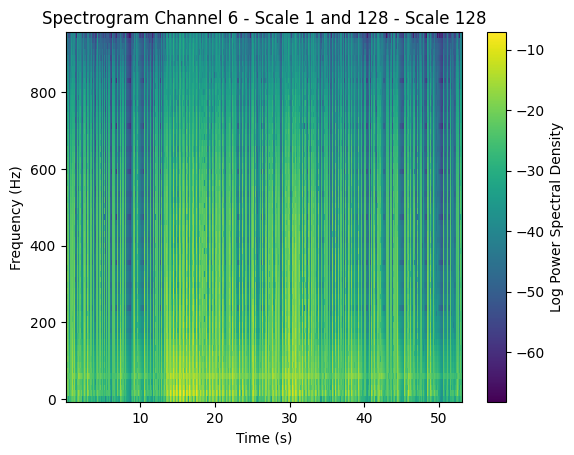

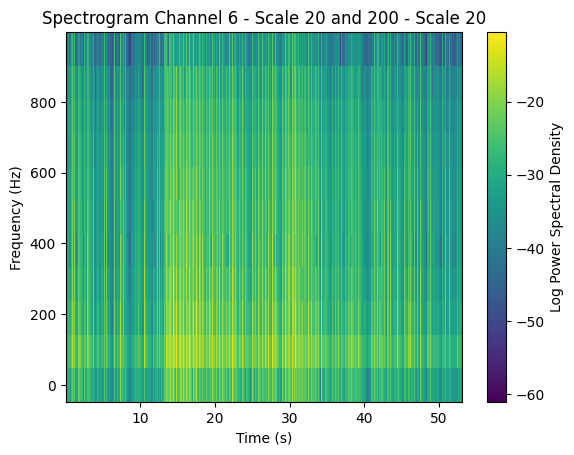

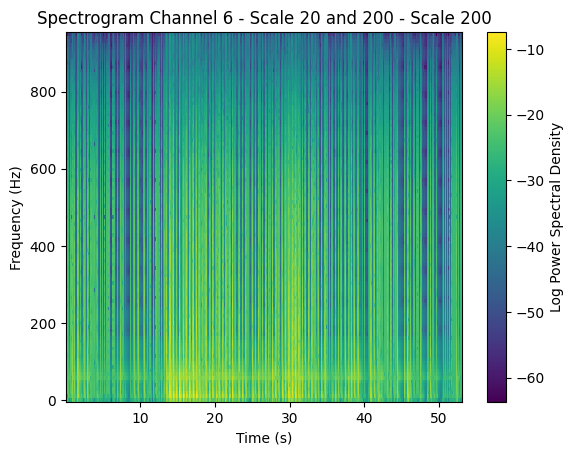

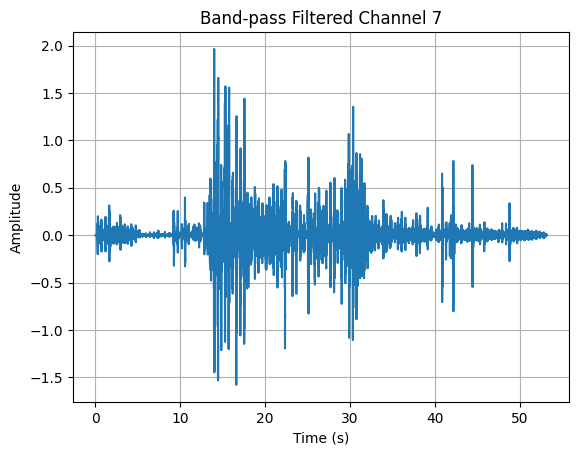

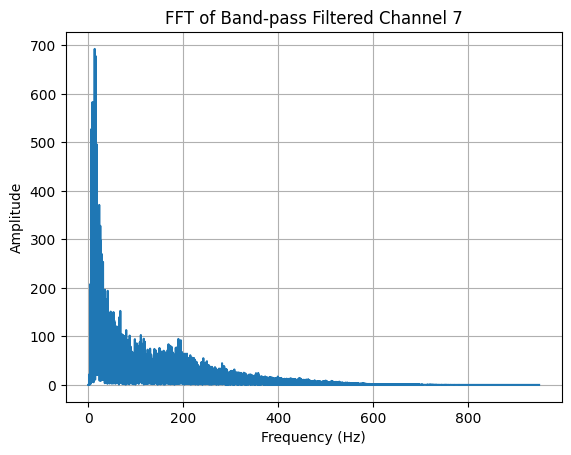

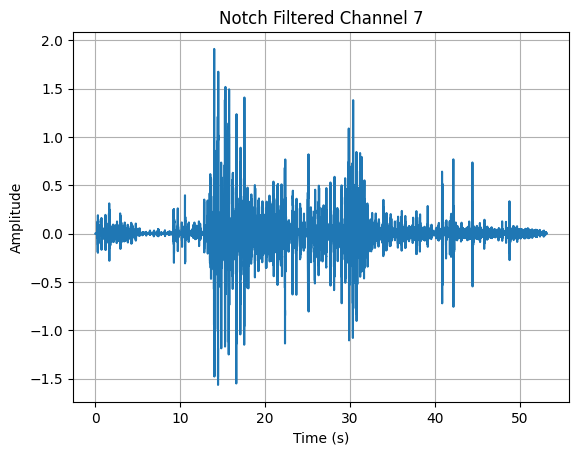

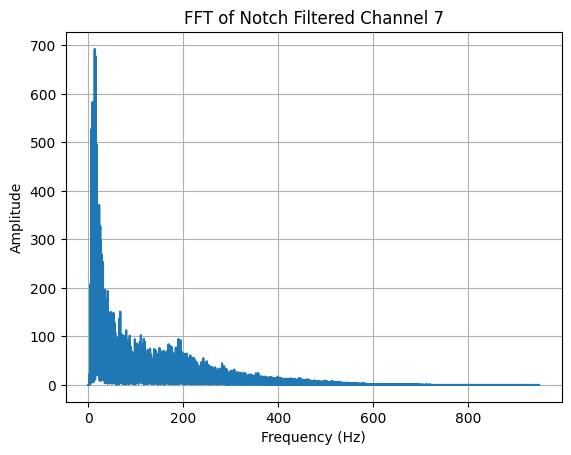

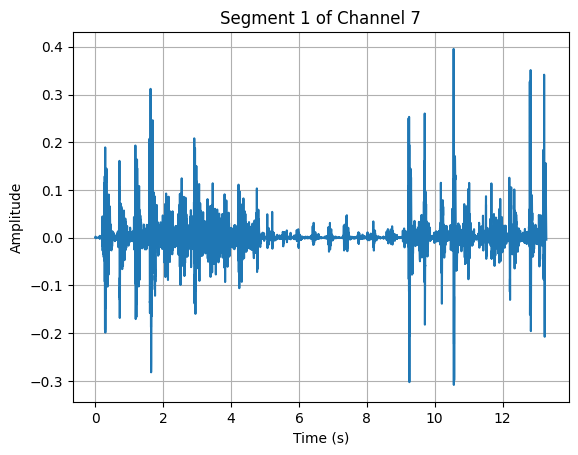

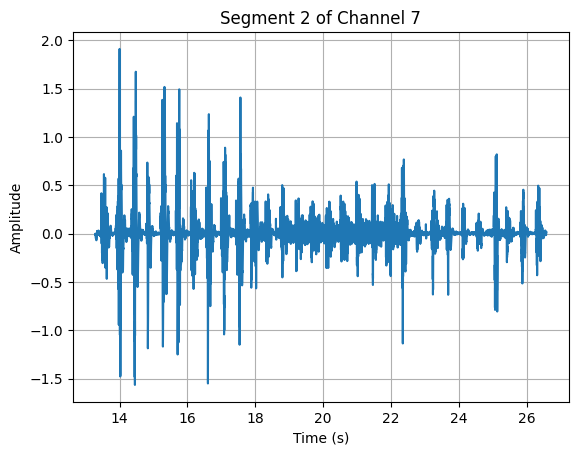

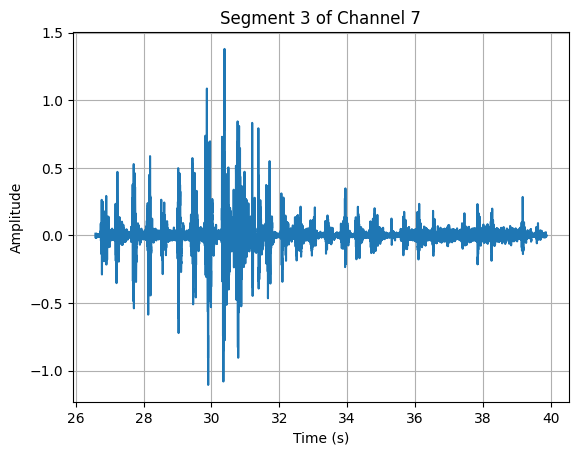

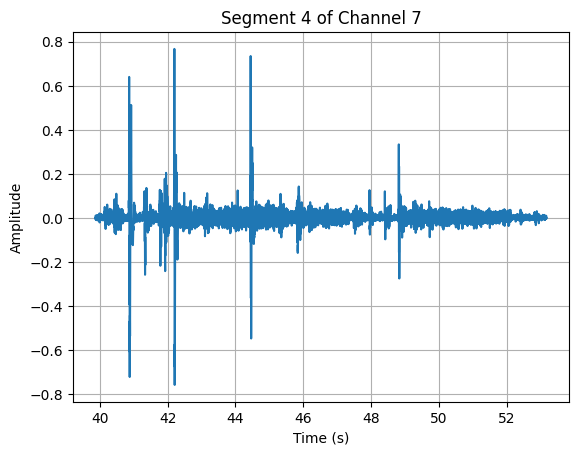

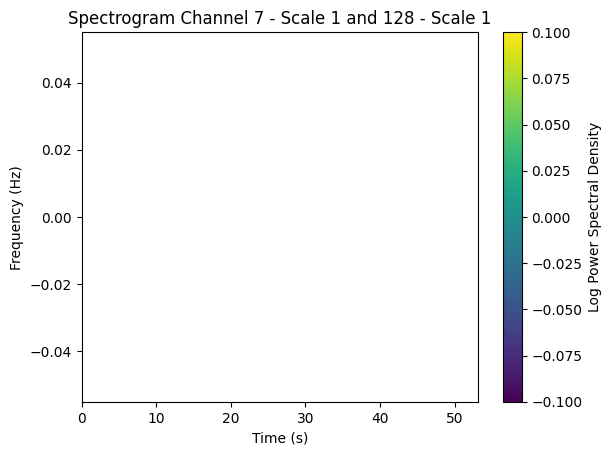

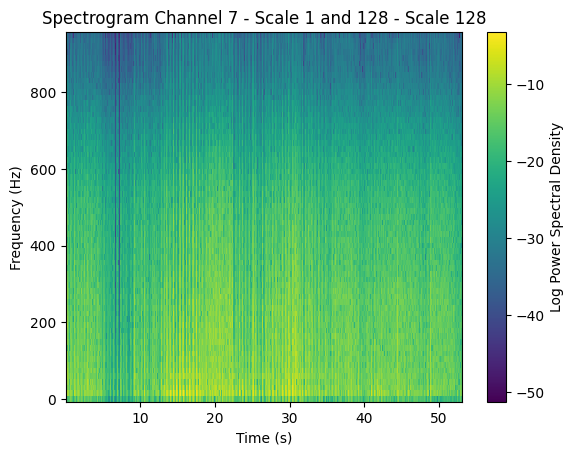

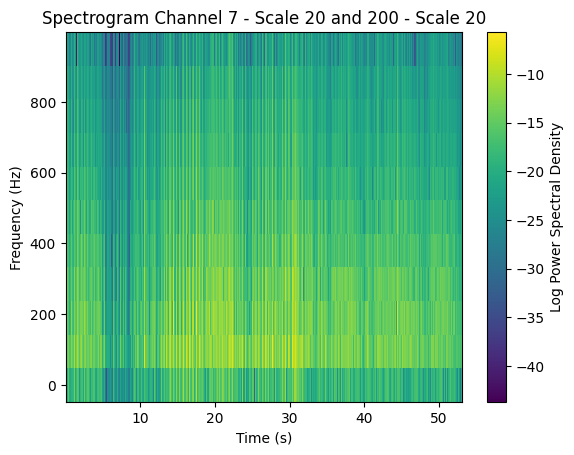

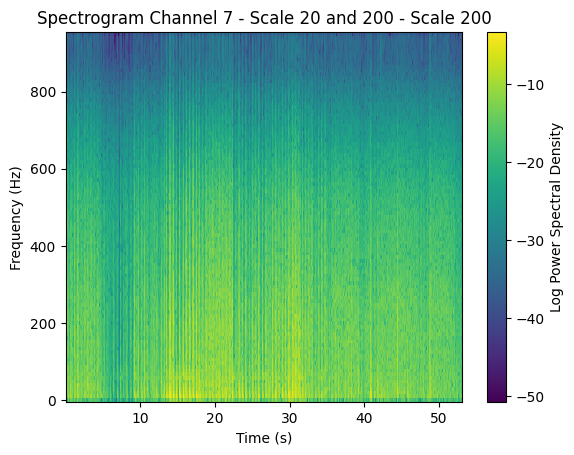

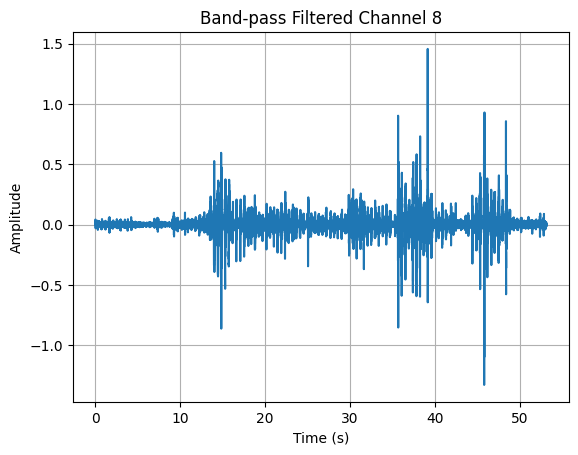

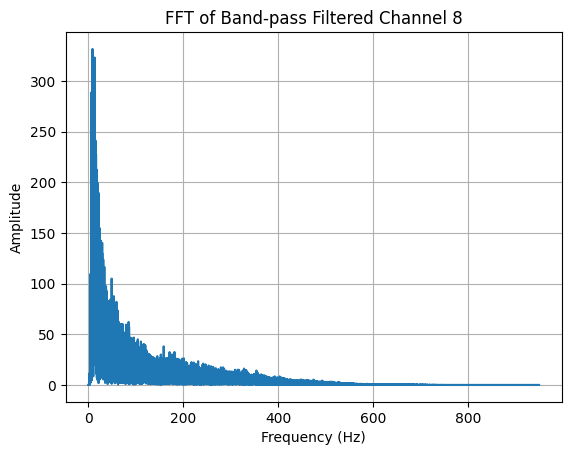

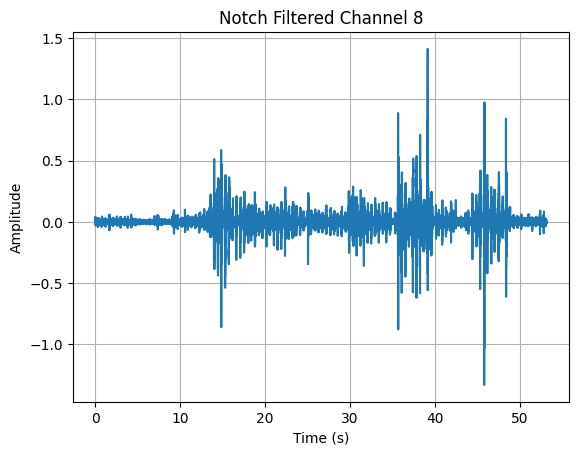

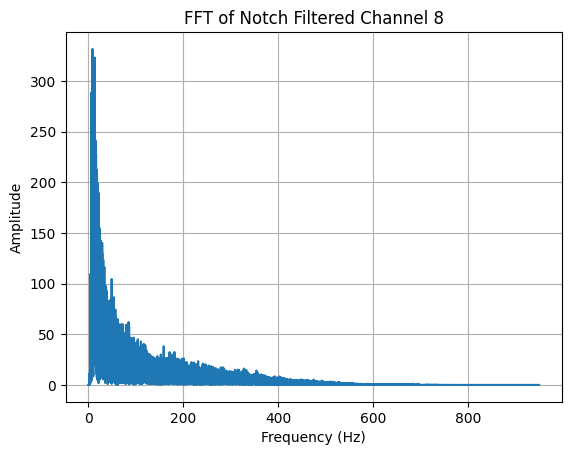

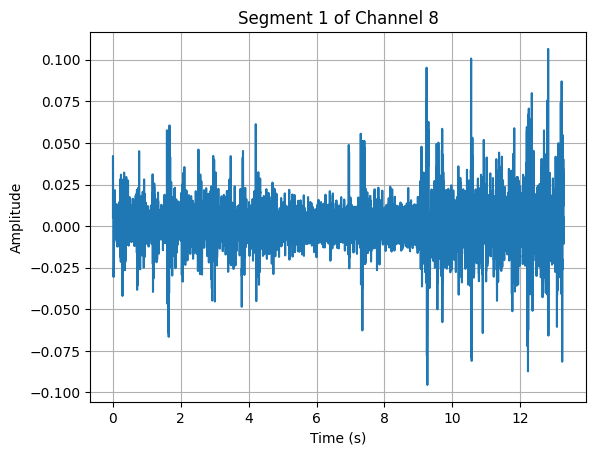

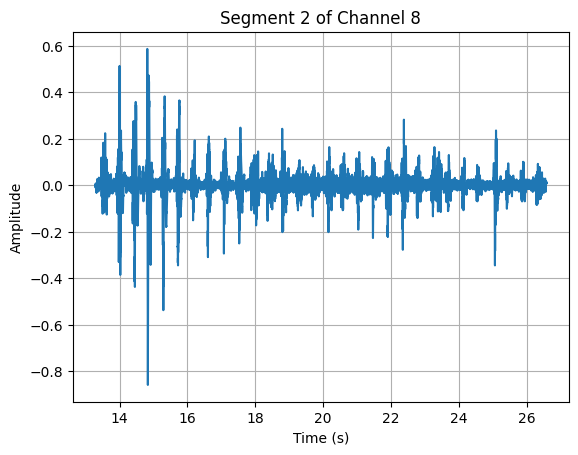

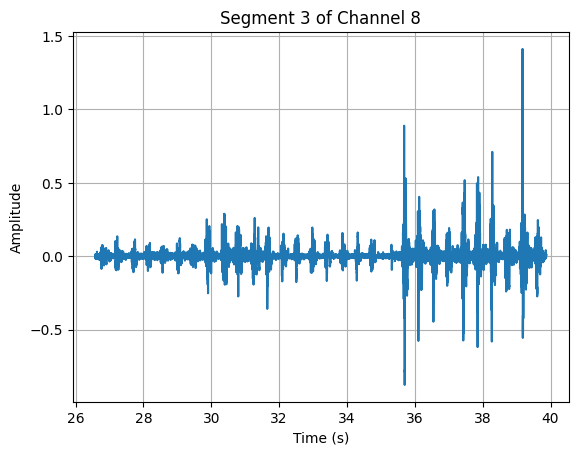

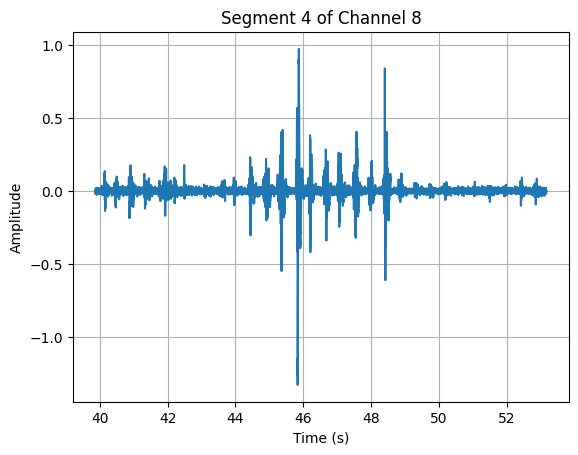

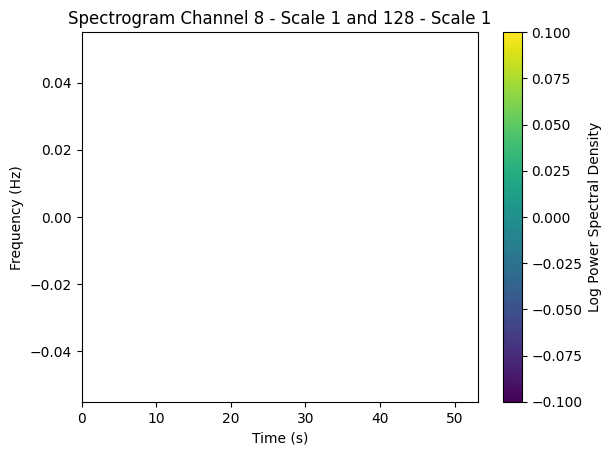

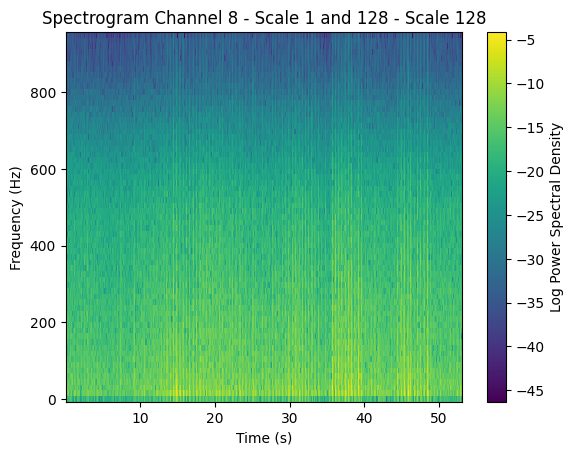

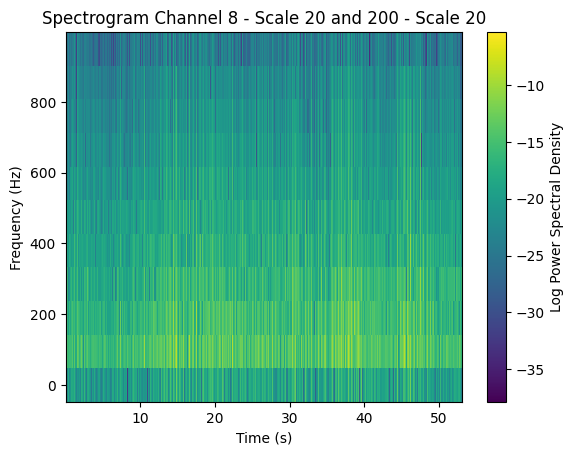

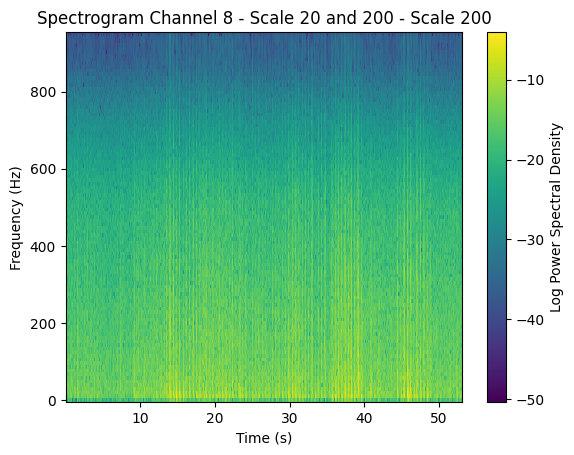

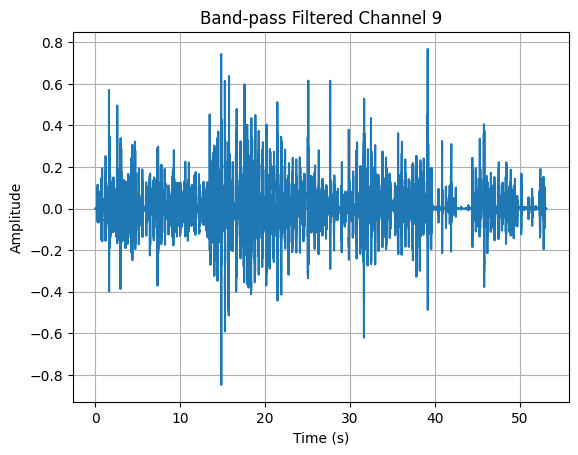

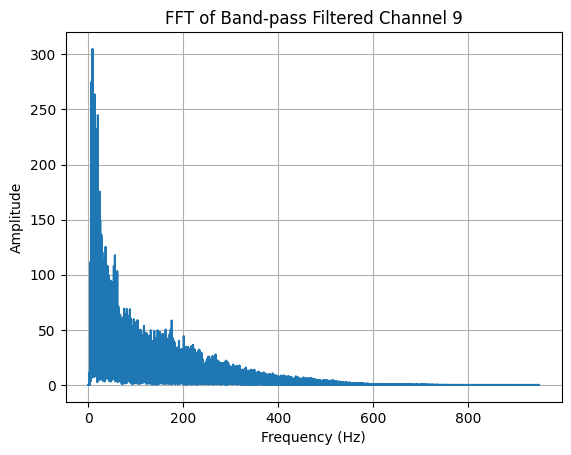

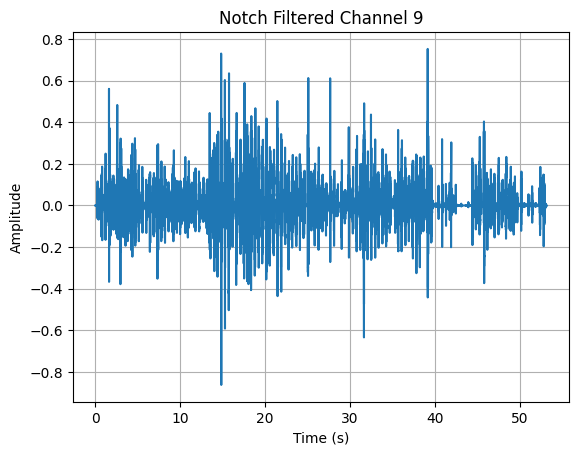

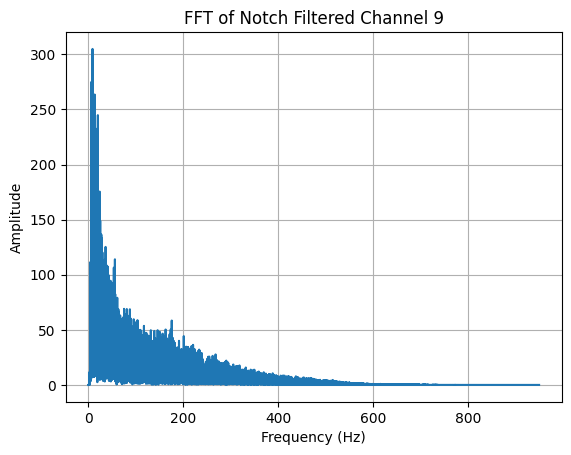

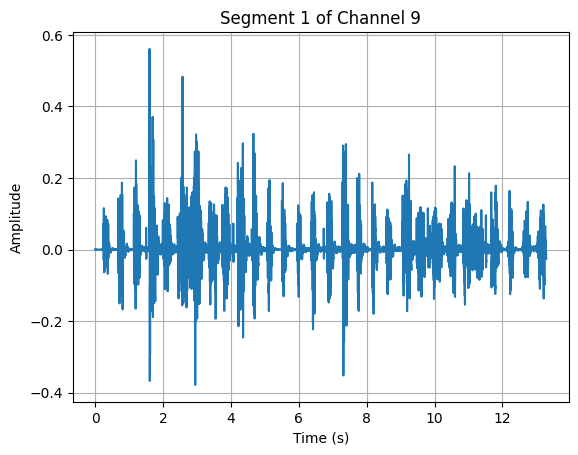

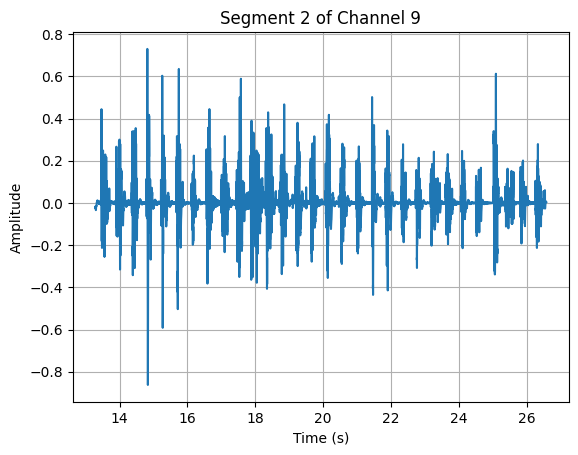

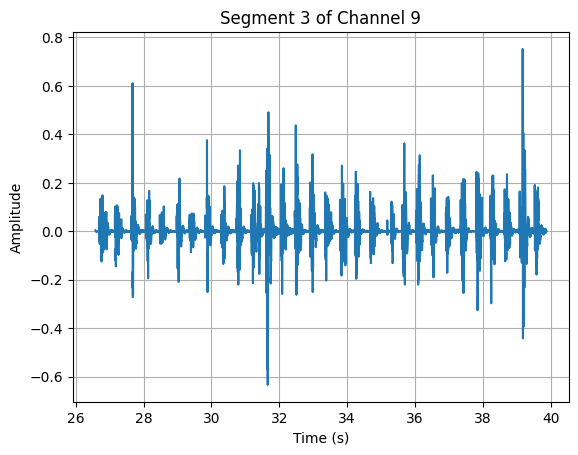

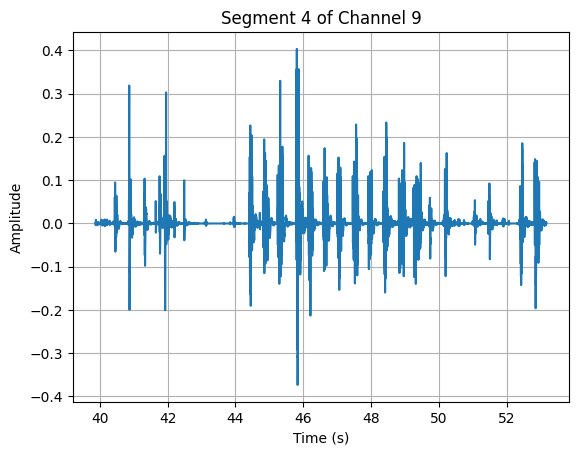

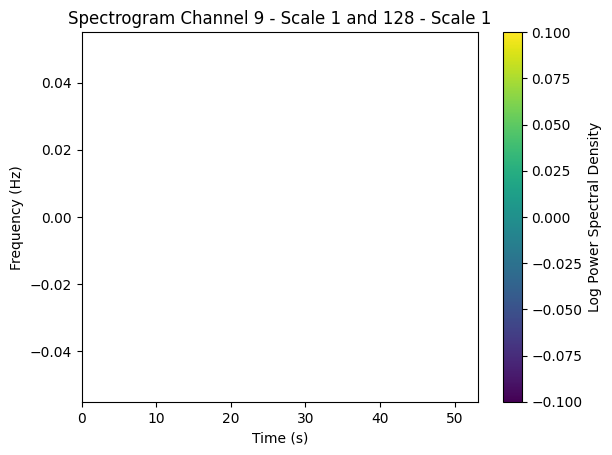

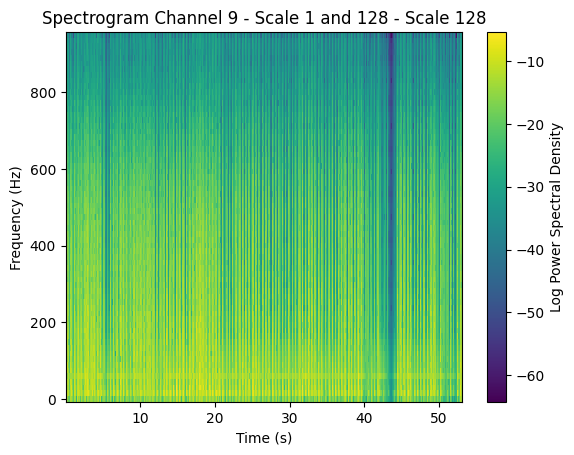

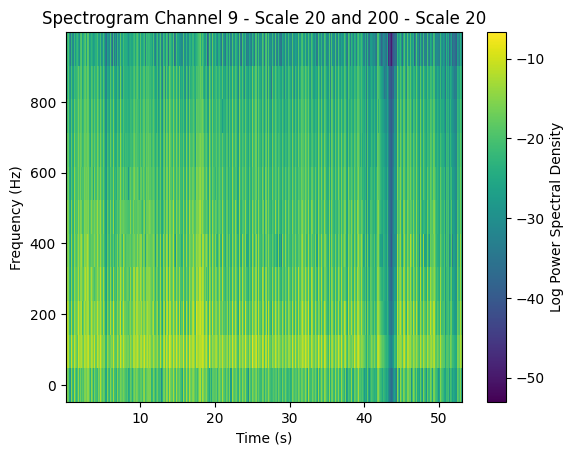

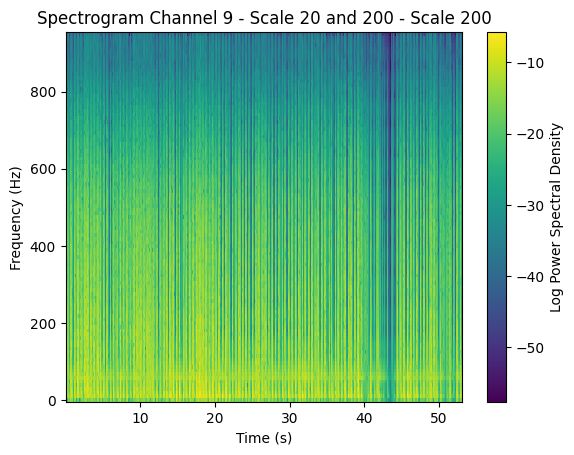

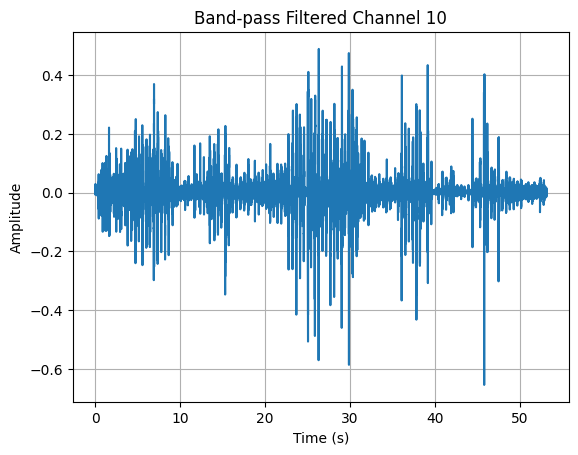

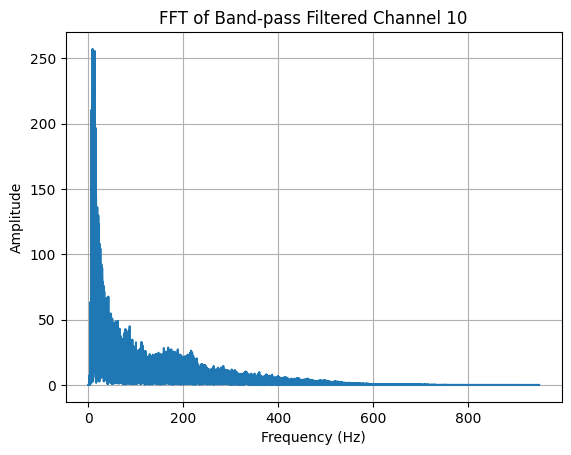

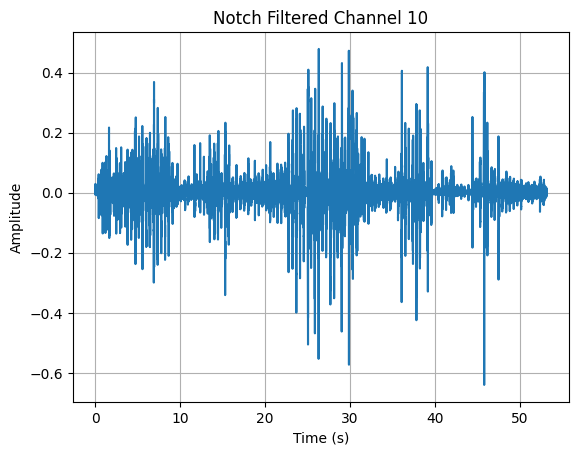

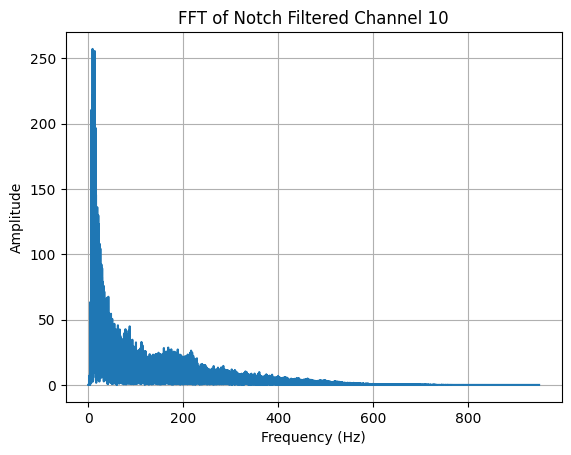

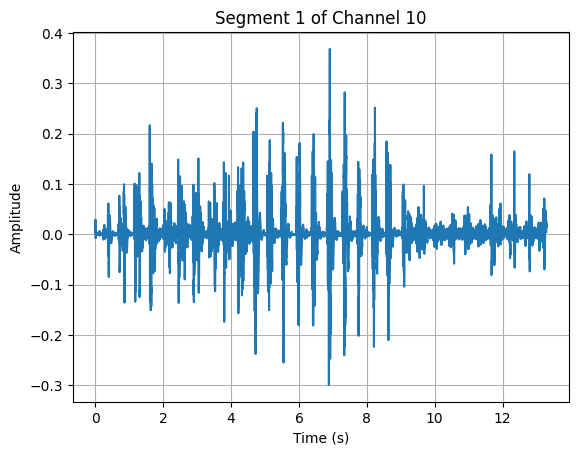

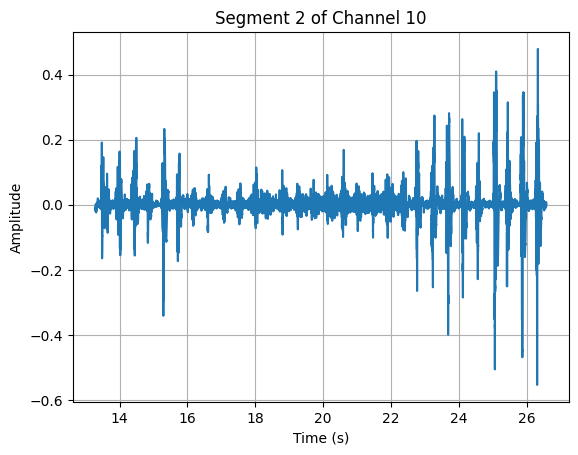

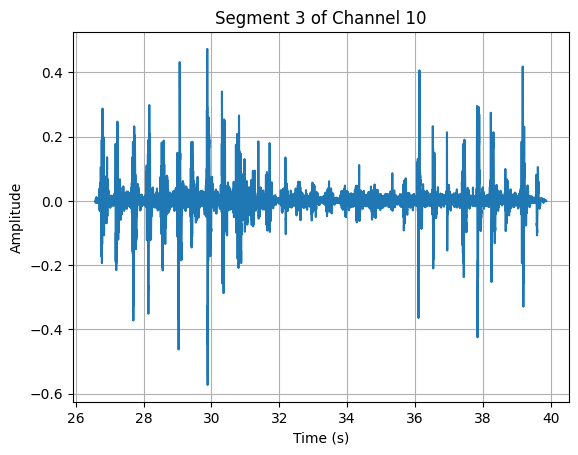

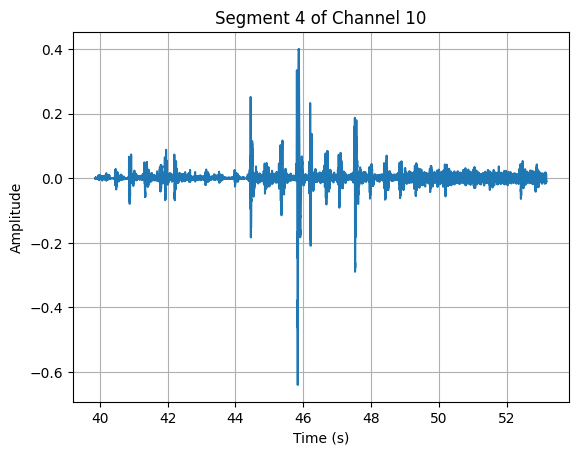

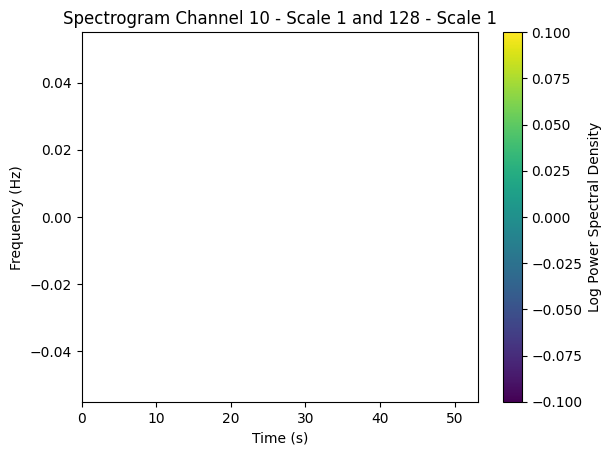

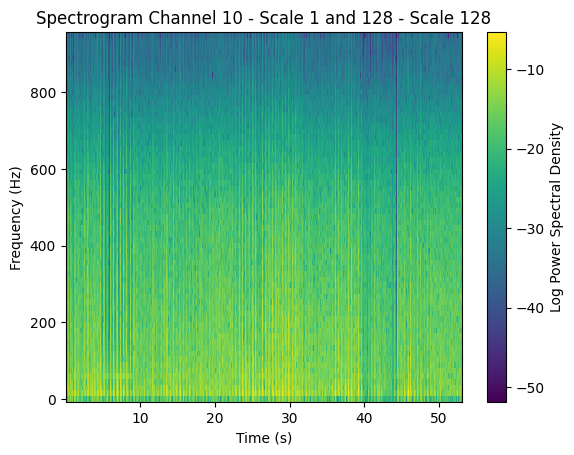

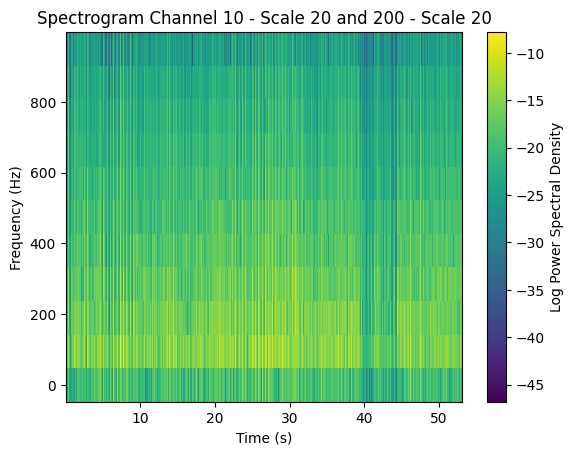

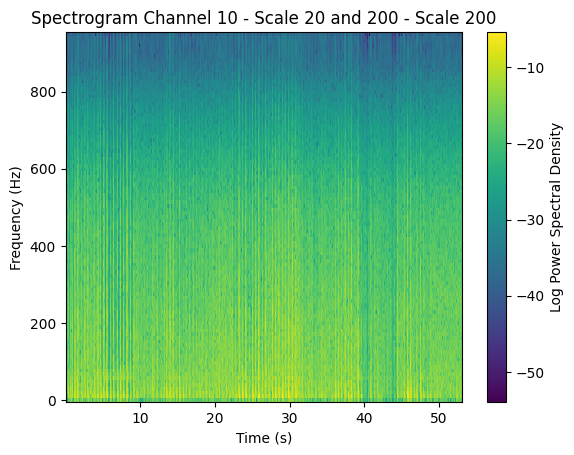

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, iirnotch, spectrogram

fs = 1900  # Sampling frequency, adjust if needed

def band_pass_filter(data, fs, lowcut=10, highcut=500, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return lfilter(b, a, data)

def notch_filter(data, fs, notch_freq=60, Q=30.0):
    nyquist = 0.5 * fs
    freq = notch_freq / nyquist
    b, a = iirnotch(freq, Q)
    return lfilter(b, a, data)

def plot_data(time, data, title=''):
    plt.figure()
    plt.plot(time, data)
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

def plot_fft(data, fs, title=''):
    N = len(data)
    yf = np.fft.fft(data)
    xf = np.fft.fftfreq(N, 1/fs)
    plt.figure()
    plt.plot(xf[:N//2], np.abs(yf[:N//2]))
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

def plot_spectrogram(data, fs, scales, title=''):
    for scale in scales:
        plt.figure()
        f, t, Sxx = spectrogram(data, fs, nperseg=scale)
        plt.pcolormesh(t, f, np.log(Sxx))
        plt.title(f'{title} - Scale {scale}')
        plt.ylabel('Frequency (Hz)')
        plt.xlabel('Time (s)')
        plt.colorbar(label='Log Power Spectral Density')
        plt.show()

# Process each channel
channels = data.shape[1]  # Assuming columns are channels

for i in range(channels):
    channel_data = data[:, i]
    time = np.arange(len(channel_data)) / fs

    # Band-pass Filter
    filtered_data = band_pass_filter(channel_data, fs)
    plot_data(time, filtered_data, f'Band-pass Filtered Channel {i+1}')
    plot_fft(filtered_data, fs, f'FFT of Band-pass Filtered Channel {i+1}')

    # Notch Filter
    notch_filtered_data = notch_filter(filtered_data, fs)
    plot_data(time, notch_filtered_data, f'Notch Filtered Channel {i+1}')
    plot_fft(notch_filtered_data, fs, f'FFT of Notch Filtered Channel {i+1}')

    # Segmentation
    segment_length = len(notch_filtered_data) // 4
    for j in range(4):
        segment = notch_filtered_data[j*segment_length:(j+1)*segment_length]
        plot_data(time[j*segment_length:(j+1)*segment_length], segment, f'Segment {j+1} of Channel {i+1}')

    # Feature Extraction (Implement these functions as needed)
    # time_features = extract_time_features(notch_filtered_data)
    # freq_features = extract_frequency_features(notch_filtered_data, fs)
    # time_freq_features = extract_time_frequency_features(notch_filtered_data, fs)

    # Create CSV file
    # features = pd.DataFrame({
    #     'Time': time_features,
    #     'Frequency': freq_features,
    #     'Time-Frequency': time_freq_features
    # })
    # features.to_csv(f'channel_{i+1}_features.csv', index=False)

    # Spectrogram
    plot_spectrogram(notch_filtered_data, fs, [1, 128], f'Spectrogram Channel {i+1} - Scale 1 and 128')
    plot_spectrogram(notch_filtered_data, fs, [20, 200], f'Spectrogram Channel {i+1} - Scale 20 and 200')
